# Model training

#### BTC-USDT for ROR_n10

<br>

#### Performance by Model ID

```
model_id: 72620c2bf904a40e011a5a59fe94f2a1062b5c1f
    - n_estimators = 500
    - max_depth = 5
    - Mean Absolute Error:	 0.0118
    - Mean Absolute Outcome:	 0.0193
    - Mean Absolute Percent Error:	 0.61121
    - Error Variance:	 0.00032
    - R-Squared:		 0.64455
```


```
model_id: 791eafd29e873099943a0eca91e34b24a57dbb9d
    - n_estimators = 500
    - max_depth = 10
    - Mean Absolute Error:	 0.01058
    - Mean Absolute Outcome:	 0.01888
    - Mean Absolute Percent Error:	 0.56026
    - Error Variance:	 0.00031
    - R-Squared:		 0.63939
```


```
model_id: dedc652b17f3c3817441dd7b216597bb742e9552
    - n_estimators = 500
    - max_depth = 20
    - Mean Absolute Error:	 0.01205
    - Mean Absolute Outcome:	 0.0193
    - Mean Absolute Percent Error:	 0.6241
    - Error Variance:	 0.00039
    - R-Squared:		 0.56522
```


```
model_id: 35fc4f0b4ef0adcc3a4d385bf29de6617b242ccf
    - n_estimators = 500
    - max_depth = 30
    - Mean Absolute Error:	 0.01282
    - Mean Absolute Outcome:	 0.0193
    - Mean Absolute Percent Error:	 0.66425
    - Error Variance:	 0.00044
    - R-Squared:		 0.50999

```


<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [1]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [2]:
# Load model data
data = dataObject("""
SELECT * EXCEPT (
  conversionType,
  conversionSymbol,
  partition_date)
FROM `algom-trading.train_features.features_BTC_USDT_hour_i02_*`
WHERE _table_suffix in (
    '20170101',
    '20180101',
    '20190101')
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 30003/30003 [00:35<00:00, 839.37rows/s] 

SUCCESS: Loaded SQL query.


In [3]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

21572


,ticker_time_sec,close,high,low,open,volume_base,volume,etl_time,ticker_time,ticker,...,MACDdiff_9_12,MACD_26_200,MACDsign_26_200,MACDdiff_26_200,MACD_20_200,MACDsign_20_200,MACDdiff_20_200,RSI_,Mass_Index_9_25,SO_pct_k
101,1513684800,17550.50,17900.00,17100.00,17250.00,791.19,13857411.78,2021-01-01 15:39:58.759132+00:00,2017-12-19 12:00:00+00:00,BTC-USDT,...,-17251.800497,1852.784576,17303.069127,-15450.284550,1949.818901,17303.069127,-15353.250226,0.438316,26.035603,0.563125
102,1513681200,17250.00,17800.00,16550.22,16852.00,1130.93,19489019.97,2021-01-01 15:39:58.759132+00:00,2017-12-19 11:00:00+00:00,BTC-USDT,...,-17251.523498,1847.692983,17292.455301,-15444.762319,1940.240158,17292.455301,-15352.215143,0.246768,26.037580,0.559923
103,1513677600,16852.00,18259.40,16300.00,18234.89,1664.19,28672615.09,2021-01-01 15:39:58.759132+00:00,2017-12-19 10:00:00+00:00,BTC-USDT,...,-17190.058344,1816.286878,17204.364241,-15388.077363,1895.998808,17204.364241,-15308.365433,0.513338,26.281003,0.281719
104,1513674000,18234.89,18695.20,18165.99,18620.01,493.80,9092425.54,2021-01-01 15:39:58.759132+00:00,2017-12-19 09:00:00+00:00,BTC-USDT,...,-17350.801676,1874.098119,17410.469393,-15536.371274,1971.762590,17410.469393,-15438.706803,0.676331,26.381577,0.130194
105,1513670400,18620.01,18650.02,18545.11,18562.01,336.16,6252763.69,2021-01-01 15:39:58.759132+00:00,2017-12-19 08:00:00+00:00,BTC-USDT,...,-17546.064495,1950.137445,17652.377514,-15702.240069,2070.303219,17652.377514,-15582.074296,0.676331,26.382349,0.713945


<br>

### Initialize modelRegression class

In [4]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n10',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
Initialized model. As a next step, run self.predict() or self.train().


In [5]:
len(model.feature_list)

74

In [15]:
# Specify regression parameters
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1,
    n_estimators=500,
    subsample=.9,
    criterion='friedman_mse', 
    min_samples_split=3, 
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_depth=30,
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None,
    random_state=None, 
    max_features=None, 
    alpha=0.9, 
    verbose=0,
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001
)


# Train model
model.train(reg)


Training model on ROR_n10.
Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Set feature_importance to `self.feature_importance.feature_importance`
Fit model in 0:00:00.000024.
Get model performance.
Set evaluation to self.evaluations in 0:00:00.000024.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.01282
        - Mean Absolute Outcome:	 0.0193
        - Mean Absolute Percent Error:	 0.66425
        - Error Variance:	 0.00044
        - R-Squared:		 0.50999
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predicti

In [16]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: 35fc4f0b4ef0adcc3a4d385bf29de6617b242ccf
model_execution_id: ea6bed2f520ac55326fd55268edb7b81cfce6352


In [17]:
# Save model (optional)
model.save()


Dumped model to:
	/home/jovyan/algomosaic/data/models/20210102_GradientBoostingRegressor_35fc4f0b4ef0adcc3a4d385bf29de6617b242ccf.pickle
Uploaded pickle to Google Storage:
	https://storage.googleapis.com/algom-trading-sto/models/20210102_GradientBoostingRegressor_35fc4f0b4ef0adcc3a4d385bf29de6617b242ccf.pickle
SUCCESS: Loaded DataFrame.


1it [00:03,  3.02s/it]

Uploaded storage metadata to Google BigQuery:
	storage.model_storage_YYYYMMDD
Saved model to Google Storage:
	models/20210102_GradientBoostingRegressor_35fc4f0b4ef0adcc3a4d385bf29de6617b242ccf.pickle


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [12]:
start_date='2019-06-01'
end_date='2019-07-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


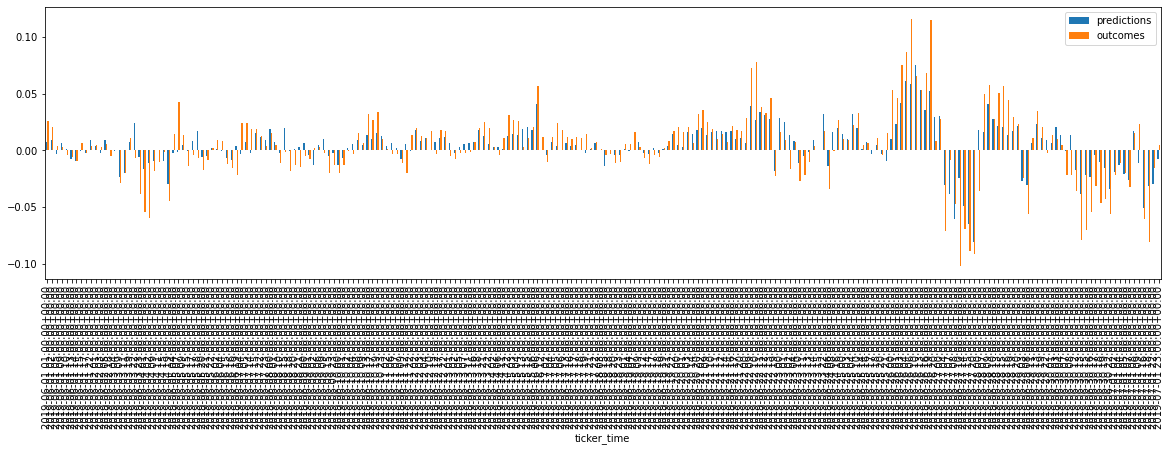

In [13]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


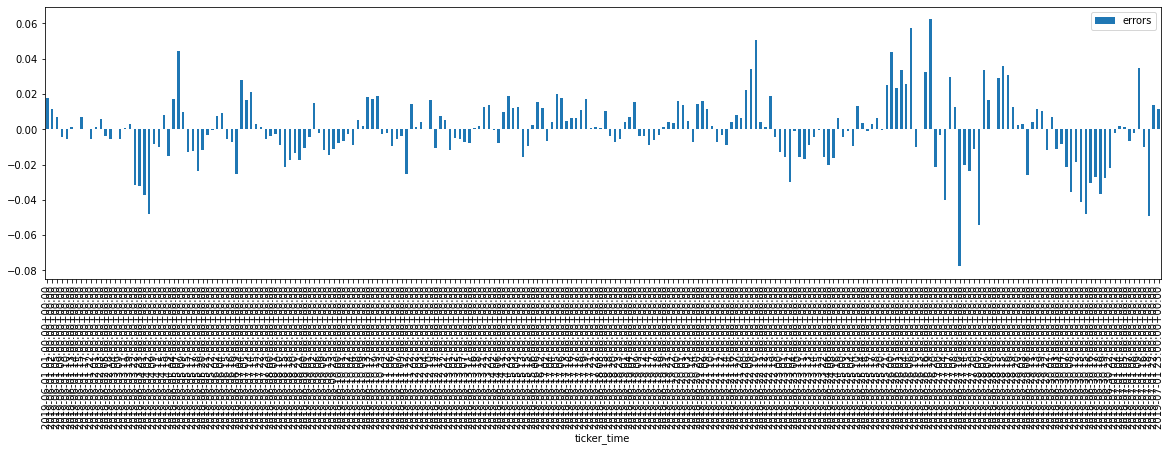

In [14]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


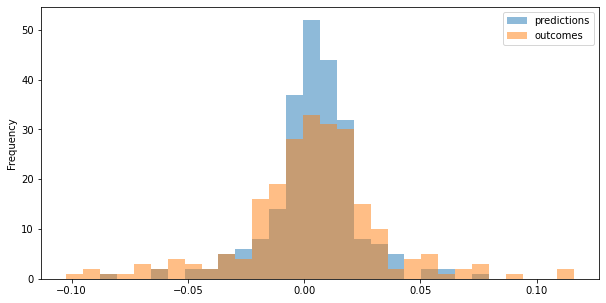

In [15]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


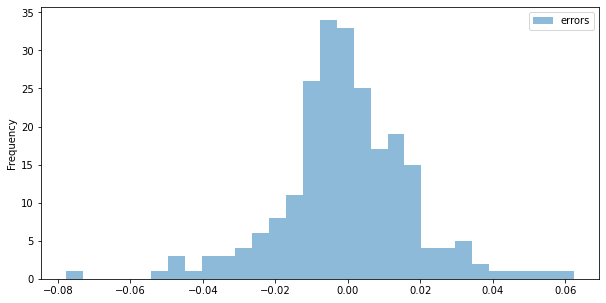

In [16]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


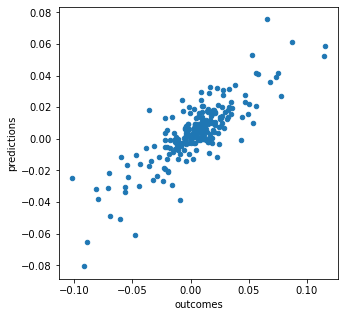

In [17]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [18]:
features = model.feature_importance.feature_importance
features[0:30]


,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,ATR_,0.06859,1.0,1.000000
1,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_250,0.03554,2.0,0.986486
2,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,BollingerB_200,0.03344,3.0,0.972973
3,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_300,0.03305,4.0,0.959459
4,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_200,0.03075,5.0,0.945946
5,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,SO_pct_k,0.02860,6.0,0.932432
6,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Mass_Index_9_25,0.02837,7.0,0.918919
7,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,BollingerB_50,0.02804,8.0,0.905405
8,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,MACDdiff_26_200,0.02735,9.0,0.891892
9,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,BollingerB_150,0.02685,10.0,0.878378


<br>

### Least import features

In [19]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
54,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Bollinger_pct_b_10,0.00694,55.0,0.270270
55,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,MACD_9_12,0.00688,56.0,0.256757
56,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Bollinger_pct_b_200,0.00685,57.0,0.243243
57,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_volume_20,0.00664,58.0,0.229730
58,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_3,0.00632,59.5,0.209459
59,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_6,0.00632,59.5,0.209459
60,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_9,0.00613,61.0,0.189189
61,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_5,0.00592,62.0,0.175676
62,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,AROR_8,0.00556,63.0,0.162162
63,b7bd5758b69b9e858bbc3e2db8ef148fa563569d,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n10,Bollinger_pct_b_150,0.00538,64.0,0.148649


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
